# Employee Attrition Prediction Using Logistic Regression

## Objective
The objective of this project is to analyze HR data and build a **Logistic Regression classification model** to predict whether an employee is likely to leave the organization.

This project focuses on identifying key factors influencing employee attrition and evaluating model performance using classification metrics.

## Dataset Overview
The dataset consists of employee-related features such as demographics, job role, work conditions, and performance indicators.

- **Target Variable:** Attrition (Yes / No)
- **Problem Type:** Binary Classification

## Approach
The workflow includes data preprocessing, exploratory data analysis, feature selection, model training using Logistic Regression, and performance evaluation using accuracy, precision, recall, F1-score, and confusion matrix.


### Importing Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

### Loading Dataset:

In [2]:
hr_df = pd.read_csv(r"HR_file.csv")
hr_df

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2,157,3,0,1,0,sales,low,31
1,0.80,0.86,5,262,6,0,1,0,sales,medium,71
2,0.11,0.88,7,272,4,0,1,0,sales,medium,8
3,0.72,0.87,5,223,5,0,1,0,sales,low,68
4,0.37,0.52,2,159,3,0,1,0,sales,low,48
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,49
14995,0.37,0.48,2,160,3,0,1,0,support,low,3
14996,0.37,0.53,2,143,3,0,1,0,support,low,5
14997,0.11,0.96,6,280,4,0,1,0,support,low,78


### Basic Understanding of the Data:

In [3]:
# print First 5 rows

hr_df.head()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2,157,3,0,1,0,sales,low,31
1,0.80,0.86,5,262,6,0,1,0,sales,medium,71
2,0.11,0.88,7,272,4,0,1,0,sales,medium,8
3,0.72,0.87,5,223,5,0,1,0,sales,low,68
4,0.37,0.52,2,159,3,0,1,0,sales,low,48


In [4]:
# No of Rows & Columns

hr_df.shape

(14999, 11)

In [5]:
# Checking the structure of the data

hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Satisfaction Level         14999 non-null  float64
 1   Last Evaluation            14999 non-null  float64
 2   Number of Projects         14999 non-null  int64  
 3   Monthly Hours              14999 non-null  int64  
 4   Total Time at the Company  14999 non-null  int64  
 5   Work Accidents             14999 non-null  int64  
 6   Quit the Company           14999 non-null  int64  
 7   Promoted in Last 5 yrs     14999 non-null  int64  
 8   Departments                14999 non-null  object 
 9   salary                     14999 non-null  object 
 10  Management                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [6]:
# Checking the datatypes of features

hr_df.dtypes

Satisfaction Level           float64
Last Evaluation              float64
Number of Projects             int64
Monthly Hours                  int64
Total Time at the Company      int64
Work Accidents                 int64
Quit the Company               int64
Promoted in Last 5 yrs         int64
Departments                   object
salary                        object
Management                     int64
dtype: object

In [7]:
# Checking the description of the data

hr_df.describe(include='all')

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999,14999.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316,NaN
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN,11.706780
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN,25.300786
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000


### Data Pre Processing:

In [8]:
# Checking the null values

hr_df.isnull().sum()

Satisfaction Level           0
Last Evaluation              0
Number of Projects           0
Monthly Hours                0
Total Time at the Company    0
Work Accidents               0
Quit the Company             0
Promoted in Last 5 yrs       0
Departments                  0
salary                       0
Management                   0
dtype: int64

In [9]:
# Checking the duplicates in the dataset

hr_df.duplicated().sum()

np.int64(1463)

### Our data has duplicates, So we have to drop the duplicates present in the dataset.

In [10]:
hr_df.drop_duplicates(inplace = True, keep="first")
hr_df.shape

(13536, 11)

In [11]:
hr_df.duplicated().sum()

np.int64(0)

In [12]:
hr_df.shape

(13536, 11)

In [13]:
# Check the columns does it has any anomalies:

for i in hr_df.columns:
    print({i:hr_df[i].unique()})

{'Satisfaction Level': array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])}
{'Last Evaluation': array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63,

### Performing EDA on our dataset:

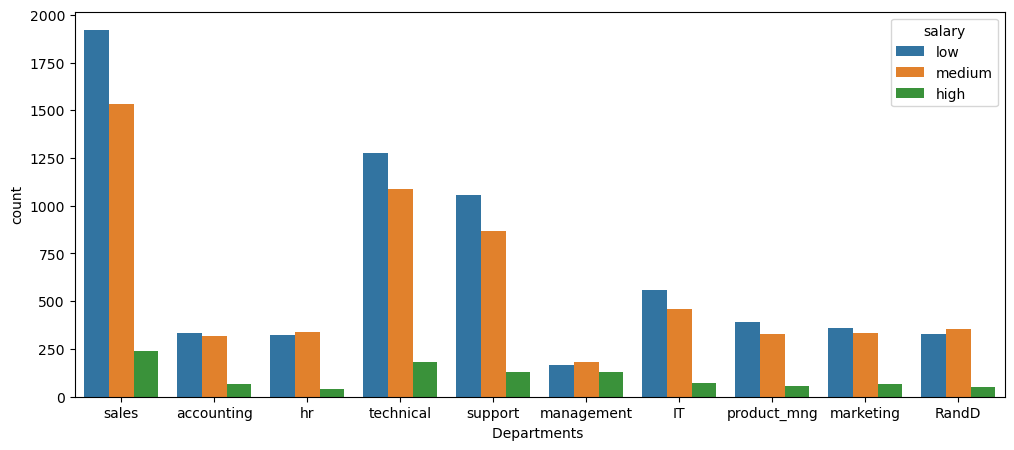

In [14]:
# 1. Which department has the highest number of low-salary employees.

plt.figure(figsize=(12,5))
sns.countplot(x='Departments ',hue='salary',data=hr_df)
plt.show()

INSIGHT: Management department has the highest number of low salary employees.

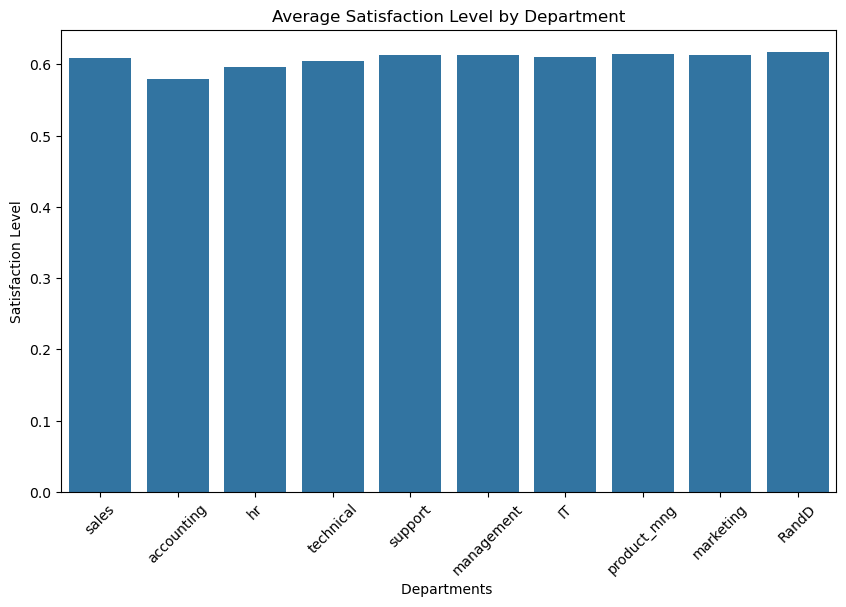

In [15]:
# Which department has the highest average employee satisfaction level?

plt.figure(figsize=(10,6))
sns.barplot(x='Departments ', y='Satisfaction Level', data=hr_df, estimator='mean', errorbar=None)
plt.title('Average Satisfaction Level by Department')
plt.xticks(rotation=45)
plt.show()

INSIGHT: By analysis, It can be seen that most of the departments has the high satifaction level.

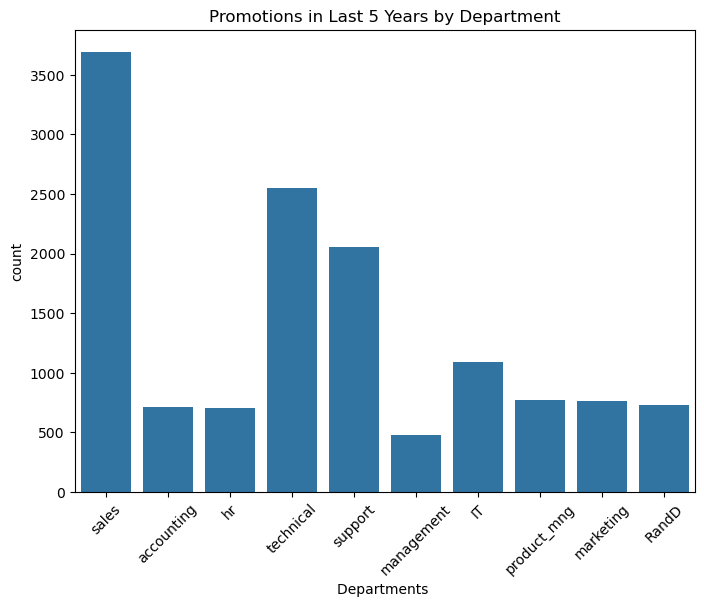

In [16]:
# Which departments had employees promoted in the last 5 years, and what were their salary levels?

plt.figure(figsize=(8,6))
sns.countplot(x='Departments ', data=hr_df)
plt.title('Promotions in Last 5 Years by Department')
plt.xticks(rotation=45)
plt.show()

INSIGHT: By analysis, It can be seen that Sales department employees are promoted in last 5 years.

In [17]:
# Which salary level had the most promotions overall?

hr_df[hr_df['Promoted in Last 5 yrs'] == 1]['salary'].value_counts()

salary
medium    123
low        47
high       44
Name: count, dtype: int64

INSIGHT: By this, It is seen that the medium salary group had the highest number of promotions in the last 5 years, followed by the low salary group, while the high salary group had the fewest promotions.

In [18]:
# How does the number of projects affect employee satisfaction?

hr_df.groupby('Number of Projects')['Satisfaction Level'].mean().sort_index()

Number of Projects
2    0.473033
3    0.688396
4    0.696798
5    0.680493
6    0.266353
7    0.117961
Name: Satisfaction Level, dtype: float64

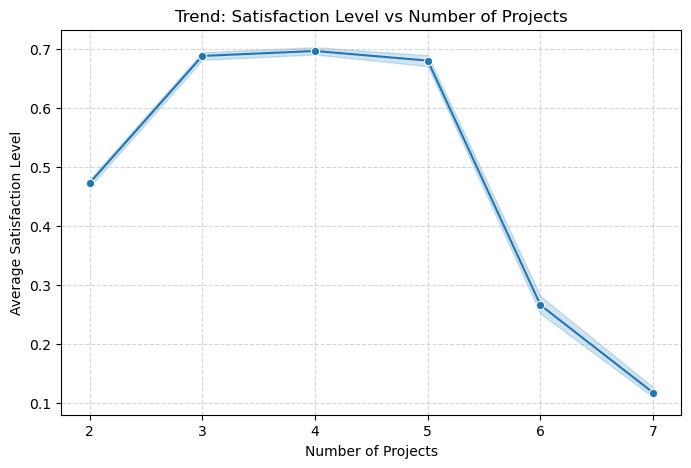

In [19]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Number of Projects', y='Satisfaction Level', data=hr_df, estimator='mean', marker='o')
plt.title('Trend: Satisfaction Level vs Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Average Satisfaction Level')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

INSIGHT: The analysis shows that employees with 3–4 projects have the highest average satisfaction levels, while those with too few (2) or too many (6–7) projects report lower satisfaction.

In [20]:
# Do employees with higher evaluation scores tend to get promoted?

hr_df.groupby('Promoted in Last 5 yrs')['Last Evaluation'].mean()

Promoted in Last 5 yrs
0    0.716693
1    0.700374
Name: Last Evaluation, dtype: float64

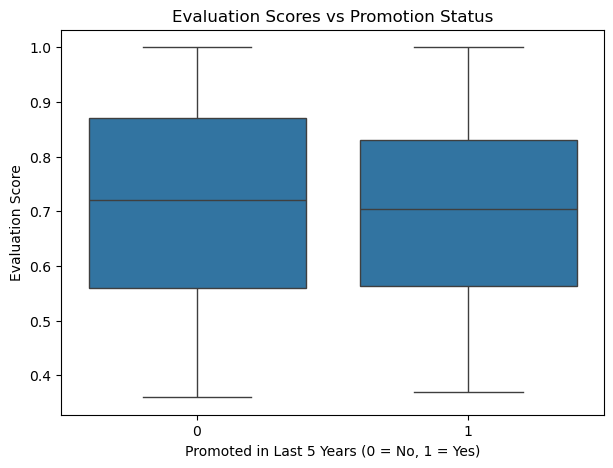

In [21]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Promoted in Last 5 yrs', y='Last Evaluation', data=hr_df)
plt.title('Evaluation Scores vs Promotion Status')
plt.xlabel('Promoted in Last 5 Years (0 = No, 1 = Yes)')
plt.ylabel('Evaluation Score')
plt.show()

INSIGHT: Yes. Employees who were promoted in the last 5 years had significantly higher average evaluation scores compared to those not promoted.

### Check the Outliers Individually:

<Axes: >

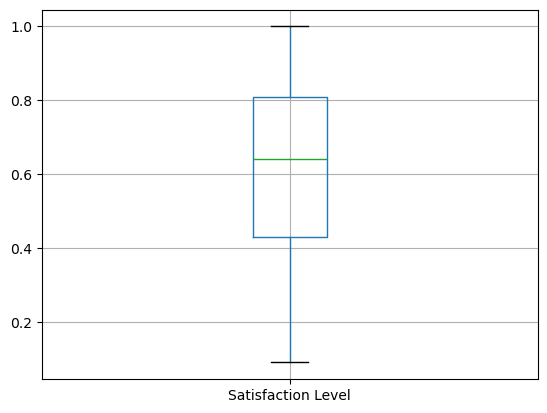

In [22]:
hr_df.boxplot(column='Satisfaction Level')

<Axes: >

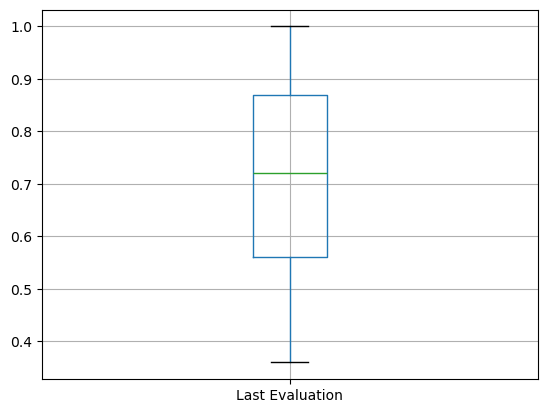

In [23]:
hr_df.boxplot(column='Last Evaluation')

<Axes: >

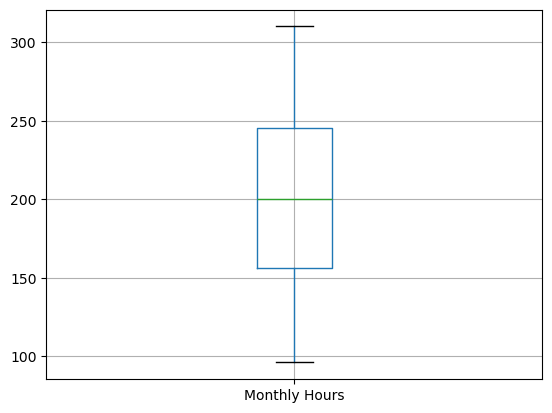

In [24]:
hr_df.boxplot(column='Monthly Hours')

In [25]:
hr_df

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2,157,3,0,1,0,sales,low,31
1,0.80,0.86,5,262,6,0,1,0,sales,medium,71
2,0.11,0.88,7,272,4,0,1,0,sales,medium,8
3,0.72,0.87,5,223,5,0,1,0,sales,low,68
4,0.37,0.52,2,159,3,0,1,0,sales,low,48
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,49
14995,0.37,0.48,2,160,3,0,1,0,support,low,3
14996,0.37,0.53,2,143,3,0,1,0,support,low,5
14997,0.11,0.96,6,280,4,0,1,0,support,low,78


<Axes: >

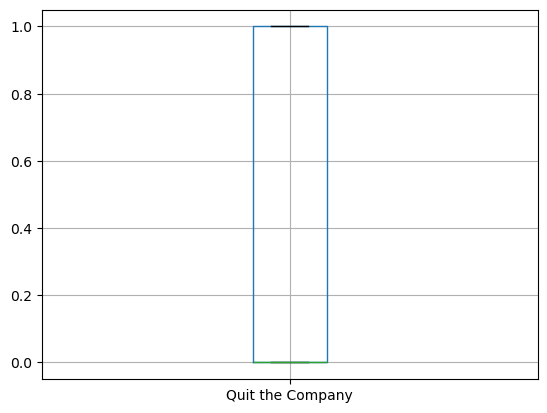

In [26]:
hr_df.boxplot(column='Quit the Company')

INSIGHT: Here, the outliers that is present are to considered as "good outliers", there is no need of dropping the outliers.

### Encoding:

In [27]:
# Finding all the categorical features.

colname=[]
for x in hr_df.columns:
    if hr_df[x].dtype=='object':
        colname.append(x)
colname

['Departments ', 'salary']

In [28]:
hr_df['Departments '].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [29]:
hr_df['Departments '].nunique()

10

In [30]:
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [31]:
hr_df['salary'].nunique()

3

In [32]:
# Applying the encoding technique

le_department = LabelEncoder()
hr_df['Departments'] = le_department.fit_transform(hr_df['Departments '])
le_name_mapping = dict(zip(le_department.classes_, le_department.transform(le_department.classes_)))
print('mapping', le_name_mapping)

mapping {'IT': np.int64(0), 'RandD': np.int64(1), 'accounting': np.int64(2), 'hr': np.int64(3), 'management': np.int64(4), 'marketing': np.int64(5), 'product_mng': np.int64(6), 'sales': np.int64(7), 'support': np.int64(8), 'technical': np.int64(9)}


In [33]:
# Applying the encoding technique


le_salary = LabelEncoder()
hr_df['Salary'] = le_salary.fit_transform(hr_df['salary'])
le_mapping = dict(zip(le_salary.classes_, le_salary.transform(le_salary.classes_)))
print('mapping', le_mapping)

mapping {'high': np.int64(0), 'low': np.int64(1), 'medium': np.int64(2)}


In [34]:
hr_df.drop(columns = ['Departments ', 'salary'], inplace = True)

In [35]:
hr_df.dtypes

Satisfaction Level           float64
Last Evaluation              float64
Number of Projects             int64
Monthly Hours                  int64
Total Time at the Company      int64
Work Accidents                 int64
Quit the Company               int64
Promoted in Last 5 yrs         int64
Management                     int64
Departments                    int64
Salary                         int64
dtype: object

### Feature Selection Using Correlation:

<Axes: >

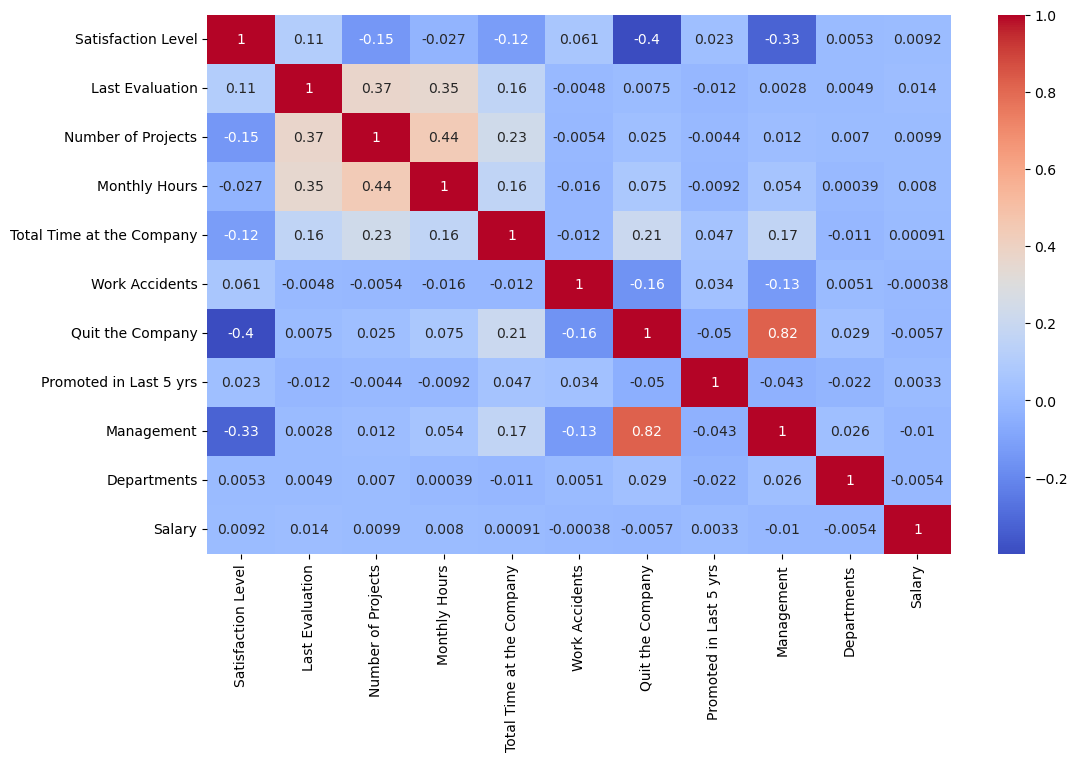

In [36]:
plt.figure(figsize=(12,7))
corr = hr_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [37]:
hr_df.corr()['Quit the Company'].sort_values(ascending=False)

Quit the Company             1.000000
Management                   0.823648
Total Time at the Company    0.207256
Monthly Hours                0.075095
Departments                  0.028626
Number of Projects           0.025014
Last Evaluation              0.007509
Salary                      -0.005702
Promoted in Last 5 yrs      -0.049751
Work Accidents              -0.160142
Satisfaction Level          -0.398124
Name: Quit the Company, dtype: float64

Insight: According to the correlation, It shows that Management,Satisfaction Level,Total Time at the Company and Work Accidents are the features that shows the relationship between the target variable

### Feature Selection on the basis of Domain knowledge:

In [38]:
hr_df.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Work Accidents',
       'Quit the Company', 'Promoted in Last 5 yrs', 'Management',
       'Departments', 'Salary'],
      dtype='object')

Insight: According to the domain knowledge "Monthly hours, Departments, Number of Projects, Last Evaluation, salary, Promoted in Last 5 yrs" are more features that can be added for model building

### Distribution of Target Feature:

In [39]:
# Targeted Column
hr_df['Quit the Company'].value_counts()

Quit the Company
0    10000
1     3536
Name: count, dtype: int64

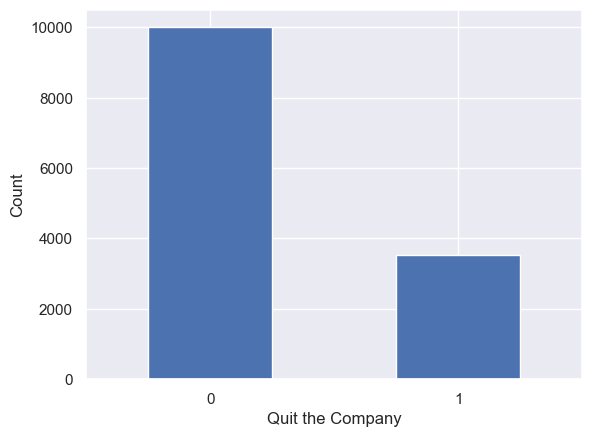

In [40]:
sns.set()
Quit_the_company=hr_df['Quit the Company'].value_counts().plot(kind='bar')
plt.xlabel('Quit the Company')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

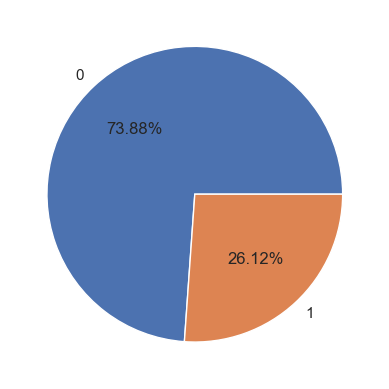

In [41]:
Quit_the_Company = hr_df['Quit the Company'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.ylabel(None);

In [42]:
hr_df['Quit the Company'].value_counts(normalize=True)

Quit the Company
0    0.738771
1    0.261229
Name: proportion, dtype: float64

### Checking the Multi-Collinearity:

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = hr_df[['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Work Accidents',
       'Promoted in Last 5 yrs', 'Departments', 'Salary',
       'Management']]

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                     Feature        VIF
0         Satisfaction Level   6.873289
1            Last Evaluation  21.214856
2         Number of Projects  14.148727
3              Monthly Hours  20.099021
4  Total Time at the Company   8.147859
5             Work Accidents   1.182526
6     Promoted in Last 5 yrs   1.022808
7                Departments   4.721924
8                     Salary   5.233901
9                 Management   1.424469


### Model Building on the basis of Scaling:

### Spliting Data:

In [44]:
features = ['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Work Accidents',
       'Promoted in Last 5 yrs', 'Departments', 'Salary', 'Management']

In [45]:
X = hr_df[features]
Y = hr_df['Quit the Company']
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X shape: (13536, 10)
Y shape: (13536,)


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [47]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(9475, 10)
(9475,)
(4061, 10)
(4061,)


### Feature Scalling:

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling completed")
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled test data shape:", X_test_scaled.shape)

Feature scaling completed
Scaled training data shape: (9475, 10)
Scaled test data shape: (4061, 10)


In [49]:
# Show mean and std after scaling (should be ~0 and ~1)
print("Training data after scaling (mean ~0, std ~1):")
print("Mean:", np.mean(X_train_scaled, axis=0).round(2))
print("Std:", np.std(X_train_scaled, axis=0).round(2))

Training data after scaling (mean ~0, std ~1):
Mean: [ 0.  0.  0. -0.  0. -0.  0.  0. -0. -0.]
Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Build and Train the Logistic Regression Model:

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Making Prediction:

In [51]:
Y_pred = logreg.predict(X_test_scaled)
print(Y_pred)
Y_pred_proba = logreg.predict_proba(X_test_scaled)
print(Y_pred_proba)

[0 0 0 ... 0 0 0]
[[0.99444953 0.00555047]
 [0.99160587 0.00839413]
 [0.8976279  0.1023721 ]
 ...
 [0.99052502 0.00947498]
 [0.98745994 0.01254006]
 [0.98253409 0.01746591]]


In [52]:
print(f"First 10 predictions: {Y_pred[:10]}")
print(f"First 10 actual values: {Y_test.values[:10]}")

First 10 predictions: [0 0 0 1 0 0 0 1 0 0]
First 10 actual values: [0 0 0 1 0 0 0 1 0 0]


### Model Performance:

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[2995    0]
 [  73  993]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2995
           1       1.00      0.93      0.96      1066

    accuracy                           0.98      4061
   macro avg       0.99      0.97      0.98      4061
weighted avg       0.98      0.98      0.98      4061

Accuracy of the model:  0.9820241319871953


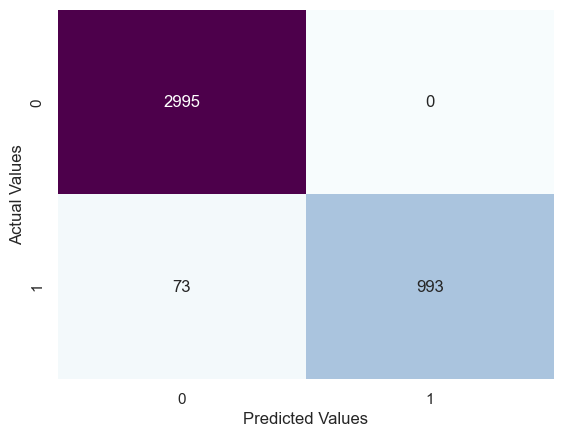

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2995
           1       1.00      0.93      0.96      1066

    accuracy                           0.98      4061
   macro avg       0.99      0.97      0.98      4061
weighted avg       0.98      0.98      0.98      4061

Accuracy of the model:  0.9820241319871953


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### Find the score of training & testing data:

In [55]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, Y_test)))

Training set score: 0.2607
Test set score: 0.2625


### Model Tuning:

In [56]:
y_pred_prob = logreg.predict_proba(X_test_scaled)
y_pred_prob[:,1]

array([0.00555047, 0.00839413, 0.1023721 , ..., 0.00947498, 0.01254006,
       0.01746591])

In [57]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 63  , type 2 error : 63  , type 1 error: 0
Errors at threshold  0.41000000000000003 : 65  , type 2 error : 65  , type 1 error: 0
Errors at threshold  0.42000000000000004 : 66  , type 2 error : 66  , type 1 error: 0
Errors at threshold  0.43000000000000005 : 67  , type 2 error : 67  , type 1 error: 0
Errors at threshold  0.44000000000000006 : 67  , type 2 error : 67  , type 1 error: 0
Errors at threshold  0.45000000000000007 : 68  , type 2 error : 68  , type 1 error: 0
Errors at threshold  0.4600000000000001 : 69  , type 2 error : 69  , type 1 error: 0
Errors at threshold  0.4700000000000001 : 71  , type 2 error : 71  , type 1 error: 0
Errors at threshold  0.4800000000000001 : 72  , type 2 error : 72  , type 1 error: 0
Errors at threshold  0.4900000000000001 : 72  , type 2 error : 72  , type 1 error: 0
Errors at threshold  0.5000000000000001 : 73  , type 2 error : 73  , type 1 error: 0
Errors at threshold  0.5100000000000001 : 74  , type 2 error : 74  , type 1

In [58]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.4:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 

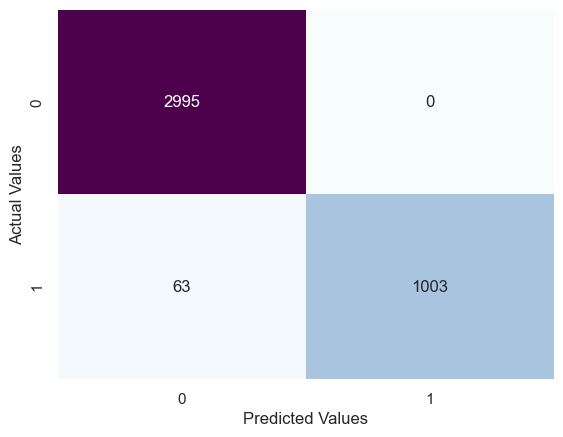

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2995
           1       1.00      0.94      0.97      1066

    accuracy                           0.98      4061
   macro avg       0.99      0.97      0.98      4061
weighted avg       0.98      0.98      0.98      4061

Accuracy of the model:  0.9844865796601823


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)

## Conclusion

The Logistic Regression model demonstrates strong performance in predicting employee attrition, achieving approximately **98% accuracy** on the test dataset. The classification report indicates high precision and recall for both attrition and non-attrition classes.

The confusion matrix shows that the model correctly classifies the majority of employees, with minimal misclassification. Balanced precision and recall values suggest that the model does not suffer from significant bias toward any class.

Overall, this model provides a reliable and interpretable solution for employee attrition prediction. The insights derived from this analysis can help HR teams proactively identify at-risk employees and support data-driven workforce retention strategies. Further improvements may include trying advanced models or handling class imbalance techniques.
